For Text Mining assignment

 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [33]:
!python -m spacy download en_core_web_sm

2023-08-20 19:02:31.124370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import pandas
elon=pd.read_csv("Elon_musk.csv",encoding='cp1252')
elon

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [35]:
elon=[Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon=[Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [36]:
# Joining the list into one string/text
elon_text = ' '.join(elon)
elon_text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [38]:
#Punctuation
no_punc_text = elon_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [39]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
len(text_tokens)

21785

In [41]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution']


In [43]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [44]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [45]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would


In [47]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I', "'", 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution']


#### Feature Extraction

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [49]:
print(vectorizer.vocabulary_)

{'kunalb11': 2701, 'alien': 232, 'idaacarmack': 2439, 'ray': 3616, 'trace': 4491, 'cyberpunk': 962, 'hdr': 1676, 'nextlevel': 3152, 'have': 1670, 'try': 4525, 'joerogan': 2621, 'spotify': 4111, 'great': 1609, 'interview': 2550, 'gtera27': 1628, 'doge': 1115, 'underestimate': 4658, 'teslacn': 4337, 'congratulations': 857, 'tesla': 4331, 'china': 741, 'amazing': 258, 'execution': 1326, 'last': 2720, 'year': 4928, 'now': 3192, 'next': 3151, 'even': 1298, 'happy': 1657, 'new': 3148, 'ox': 3309, 'httpstco9wfkmyu2oj': 1866, 'frodo': 1494, 'underdoge': 4657, 'all': 235, 'thought': 4416, 'would': 4903, 'fail': 1362, 'himself': 1722, 'httpstcozgxjfdzzrm': 2399, 'owensparks': 3306, 'flcnhvy': 1436, 'anonyx10': 287, 'haha': 1642, 'thanks': 4375, 'indeed': 2488, 'tweets': 4548, 'definitely': 1017, 'represent': 3699, 'realworld': 3641, 'time': 4434, 'allocation': 237, 'the': 4382, 'entertaining': 1254, 'outcome': 3286, 'likely': 2781, 'givedirectly': 1579, 'just': 2648, 'send': 3884, 'agree': 201, 

In [50]:
print(vectorizer.vocabulary_)

{'kunalb11': 2701, 'alien': 232, 'idaacarmack': 2439, 'ray': 3616, 'trace': 4491, 'cyberpunk': 962, 'hdr': 1676, 'nextlevel': 3152, 'have': 1670, 'try': 4525, 'joerogan': 2621, 'spotify': 4111, 'great': 1609, 'interview': 2550, 'gtera27': 1628, 'doge': 1115, 'underestimate': 4658, 'teslacn': 4337, 'congratulations': 857, 'tesla': 4331, 'china': 741, 'amazing': 258, 'execution': 1326, 'last': 2720, 'year': 4928, 'now': 3192, 'next': 3151, 'even': 1298, 'happy': 1657, 'new': 3148, 'ox': 3309, 'httpstco9wfkmyu2oj': 1866, 'frodo': 1494, 'underdoge': 4657, 'all': 235, 'thought': 4416, 'would': 4903, 'fail': 1362, 'himself': 1722, 'httpstcozgxjfdzzrm': 2399, 'owensparks': 3306, 'flcnhvy': 1436, 'anonyx10': 287, 'haha': 1642, 'thanks': 4375, 'indeed': 2488, 'tweets': 4548, 'definitely': 1017, 'represent': 3699, 'realworld': 3641, 'time': 4434, 'allocation': 237, 'the': 4382, 'entertaining': 1254, 'outcome': 3286, 'likely': 2781, 'givedirectly': 1579, 'just': 2648, 'send': 3884, 'agree': 201, 

In [51]:
print(X.toarray().shape)

(16611, 4961)


Let's see how can bigrams and trigrams can be included here

In [56]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(elon)

####  Generate wordcloud

In [60]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

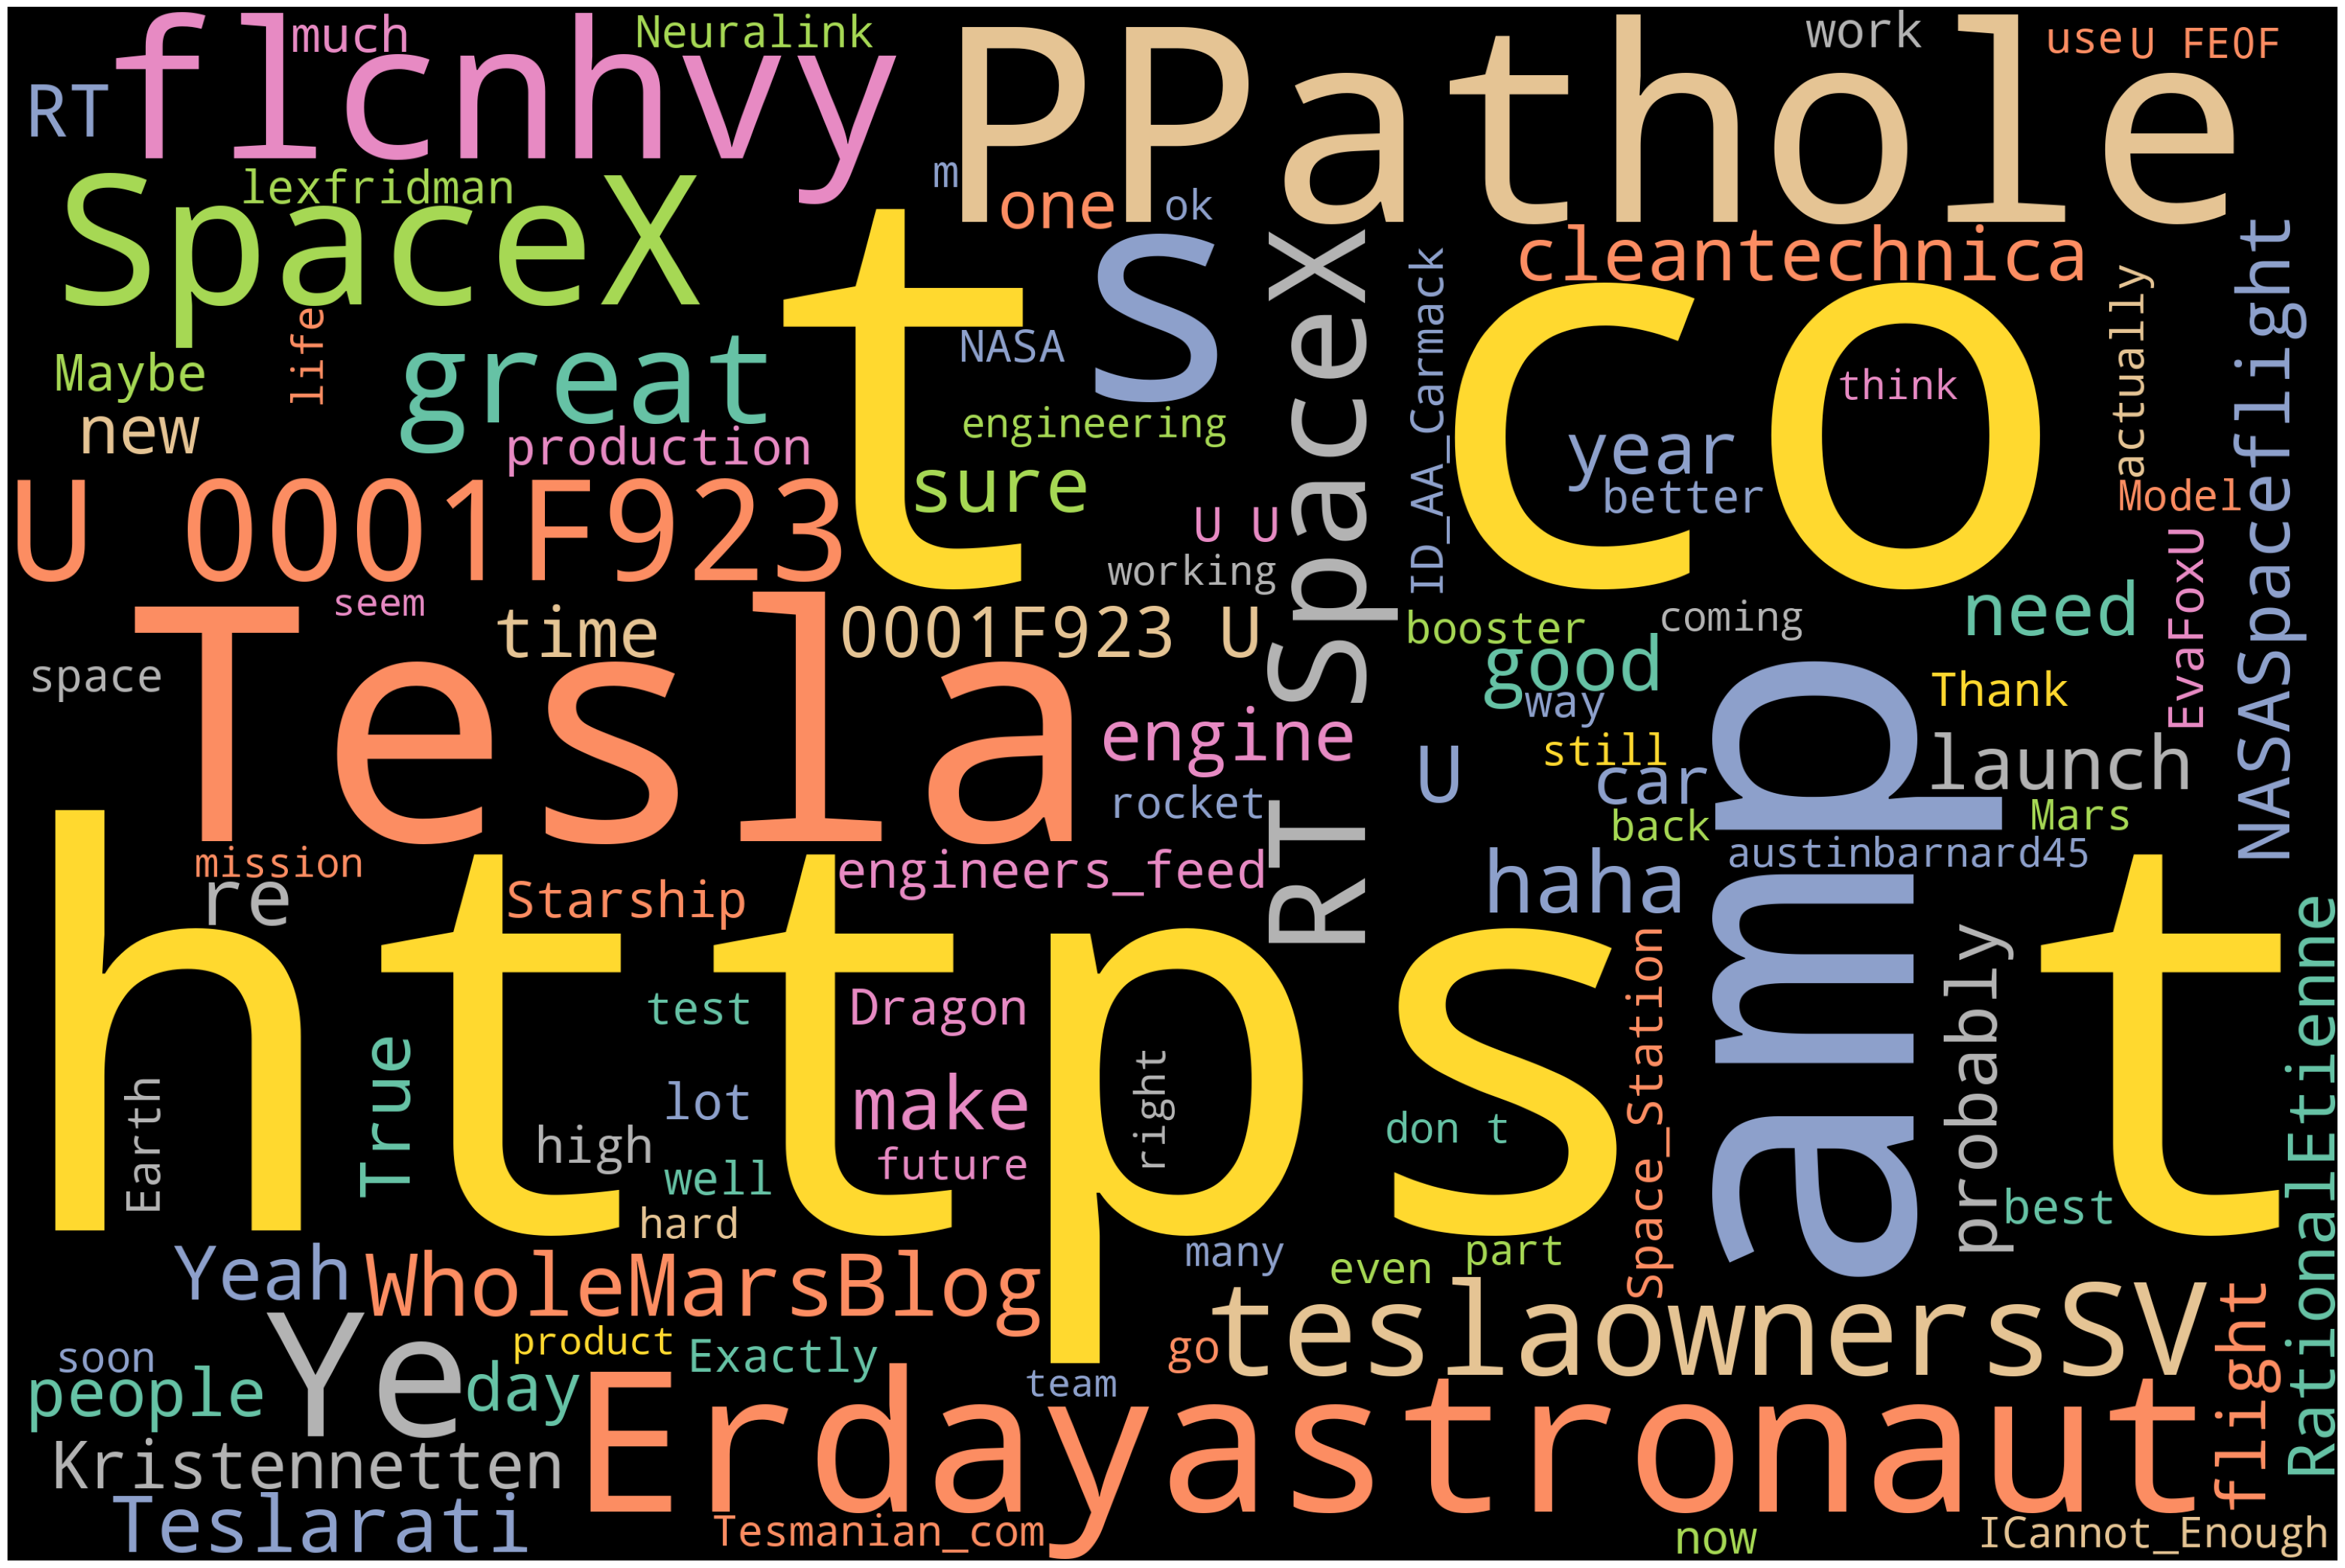

In [63]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(elon_text)
# Plot
plot_cloud(wordcloud)

Named Entity Recognition

In [68]:
clean_elon=' '.join(lemmas)
clean_elon

'kunalb11 I \' alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco9wfkmyu2oj Frodo underdoge all thought would fail himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine it \' get real buy Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc9uhQSd7O freewalletorg any crypto wallet \' give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one mission httpstco3pW

In [69]:

##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_elon
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)


Emotion Mining(Sentiment Analysis)

In [71]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(elon))
sentences

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [72]:
musk=pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk

<ipython-input-72-d067f494e587>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  musk=pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [73]:
musk=[Text.strip() for Text in musk.Text]
musk=[Text for Text in musk if Text]
musk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [74]:
one_block=musk[1]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [75]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [76]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
nouns_verbs

['tracing', 'level', 'tried']

In [77]:
len(nouns_verbs)

3

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [79]:
X.shape

(3, 3)

In [80]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [82]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [83]:
temp_df=pd.DataFrame(X.toarray(),columns=cv.get_feature_names_out())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [84]:
sum_words=X.sum(axis=0)
sum_words

matrix([[1, 1, 1]])

In [85]:
type(sum_words)

numpy.matrix

In [86]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [87]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [88]:
wf_df=pd.DataFrame({'word':cv.get_feature_names_out(),'count':np.array(sum_words).flatten()})
wf_df

,word,count
0,level,1
1,tracing,1
2,tried,1


<Axes: title={'center': 'Top verbs and Nouns'}, xlabel='word'>

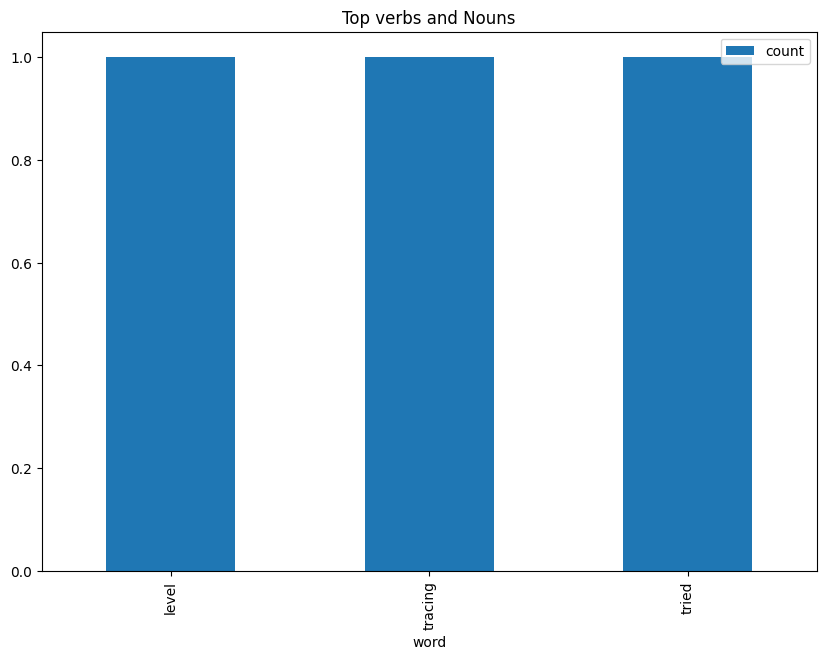

In [89]:
wf_df[0:15].plot.bar(x='word',figsize=(10,7),title='Top verbs and Nouns')

In [95]:
df = pd.read_csv('Afinn.csv', error_bad_lines=False,sep = ",", encoding = 'latin-1')
df

<ipython-input-95-085db7fc54c7>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Afinn.csv', error_bad_lines=False,sep = ",", encoding = 'latin-1')


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [96]:
df[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [97]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(musk))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [98]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [99]:
affinity_scores=df.set_index('word').to_dict()
affinity_scores

{'value': {'abandon': -2,
  'abandoned': -2,
  'abandons': -2,
  'abducted': -2,
  'abduction': -2,
  'abductions': -2,
  'abhor': -3,
  'abhorred': -3,
  'abhorrent': -3,
  'abhors': -3,
  'abilities': 2,
  'ability': 2,
  'aboard': 1,
  'absentee': -1,
  'absentees': -1,
  'absolve': 2,
  'absolved': 2,
  'absolves': 2,
  'absolving': 2,
  'absorbed': 1,
  'abuse': -3,
  'abused': -3,
  'abuses': -3,
  'abusive': -3,
  'accept': 1,
  'accepted': 1,
  'accepting': 1,
  'accepts': 1,
  'accident': -2,
  'accidental': -2,
  'accidentally': -2,
  'accidents': -2,
  'accomplish': 2,
  'accomplished': 2,
  'accomplishes': 2,
  'accusation': -2,
  'accusations': -2,
  'accuse': -2,
  'accused': -2,
  'accuses': -2,
  'accusing': -2,
  'ache': -2,
  'achievable': 1,
  'aching': -2,
  'acquit': 2,
  'acquits': 2,
  'acquitted': 2,
  'acquitting': 2,
  'acrimonious': -3,
  'active': 1,
  'adequate': 1,
  'admire': 3,
  'admired': 3,
  'admires': 3,
  'admiring': 3,
  'admit': -1,
  'admits': -

In [100]:
nlp = spacy.load('en_core_web_sm')

In [101]:
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [102]:
calculate_sentiment(text = 'Amazing, wonderful session')

0

In [103]:
calculate_sentiment(text = 'great job, best explanation ever')

0

In [104]:
calculate_sentiment(text = 'wonderful session')

0